In [ ]:
!pip install tab2img

In [ ]:
import pandas as pd

In [ ]:
# link & mount to google drive to import data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tab2img.converter import Tab2Img

In [ ]:
# import pre-processed data from google drive and store in dataframe using pandas function
# split the dataset into 6 different datasets, one for each class
# GAN model will generate samples for one class at a time, therefore dataframe needs to be split by class. Will be joined again after all samples have been generated.
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/progettoTesi/Dataset2017/improved/Pre-processed_versions/35/d_DDoS35.csv')
dfDDoS_y = df[['L_BENIGN','L_Infiltration_Portscan','L_DDoS','L_DoS','L_BruteForce','L_Botnet']]
dfDDoS = df.drop(['L_BENIGN','L_Infiltration_Portscan','L_DDoS','L_DoS','L_BruteForce','L_Botnet'], axis=1)

# Uso libreria Tab2Img - non funzia

In [ ]:
import numpy as np
from sklearn.datasets import fetch_covtype

dataset = fetch_covtype()

# np.c_ is the numpy concatenate function
# which is used to concat iris['data'] and iris['target'] arrays
# for pandas column argument: concat iris['feature_names'] list
# and string list (in this case one string); you can make this anything you'd like..
# the original dataset would probably call this ['Species']
data1 = pd.DataFrame(data= np.c_[dataset['data'], dataset['target']],
                     columns= dataset['feature_names'] + ['target'])

In [ ]:
target = dfDDoS_y.to_numpy()
train = dfDDoS.to_numpy()

In [ ]:
print(target.shape)
print(train.shape)

(95133, 6)
(95133, 35)


In [ ]:
from tab2img.converter import Tab2Img


model = Tab2Img()
images = model.fit_transform(train, target)

# Non uso libreria

In [ ]:
dfDDoS.shape

(95133, 35)

In [ ]:
# Assuming your data is stored in a Pandas DataFrame
# Adjust 'column_names' to the actual names of your 35 important features
column_names = ['FlowDuration', 'BwdPacketLengthStd', 'PacketLengthVariance', 'DstPort',
       'TotalLengthofFwdPacket', 'PacketLengthStd', 'FlowIATMax',
       'FlowPackets/s', 'FwdPacketLengthMax', 'BwdPacketLengthMax',
       'BwdSegmentSizeAvg', 'RSTFlagCount', 'BwdPacketLengthMean',
       'SubflowFwdBytes', 'PacketLengthMean', 'PacketLengthMax',
       'FwdPackets/s', 'AveragePacketSize', 'FwdSegmentSizeAvg',
       'FwdPacketLengthMean', 'FlowBytes/s', 'SubflowBwdBytes',
       'BwdBulkRateAvg', 'FwdPacketLengthStd', 'TotalLengthofBwdPacket',
       'FwdHeaderLength', 'FlowIATMean', 'BwdHeaderLength', 'FwdRSTFlags',
       'FWDInitWinBytes', 'BwdInitWinBytes', 'FwdIATMax', 'BwdPackets/s',
       'ACKFlagCount', 'FwdSegSizeMin']

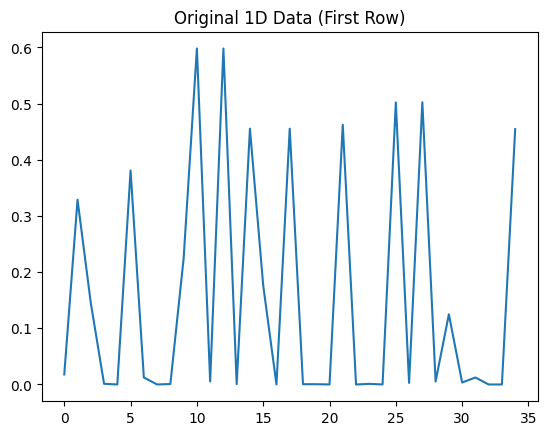

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


# Extract the first row
first_row_data = dfDDoS.iloc[0][column_names].values

# Reshape the 1D data into a 2D grid
image_size = (1, len(column_names))
grid = np.reshape(first_row_data, image_size)

# Create a 2D gray-scale image
image = np.array(grid * 255, dtype=np.uint8)  # Assuming already in [0, 1] range

# Display the original 1D data and the resulting image
plt.plot(first_row_data)
plt.title('Original 1D Data (First Row)')

plt.show()

In [ ]:
first_row_data

array([1.78162588e-02, 3.28916164e-01, 1.45136164e-01, 1.22083352e-03,
       1.55397113e-06, 3.80967405e-01, 1.24414692e-02, 1.86261605e-06,
       8.05801773e-04, 2.24270353e-01, 5.98091472e-01, 5.26315789e-03,
       5.98091472e-01, 5.62746201e-04, 4.55347342e-01, 1.76470588e-01,
       1.63708072e-06, 4.55347342e-01, 4.94700521e-04, 4.94700521e-04,
       2.14733965e-05, 4.62200957e-01, 0.00000000e+00, 1.06221395e-03,
       1.76900739e-05, 5.02016622e-01, 2.81679264e-03, 5.02353157e-01,
       5.26315789e-03, 1.25001907e-01, 3.49431601e-03, 1.24414636e-02,
       1.16934337e-06, 2.14977691e-05, 4.54545455e-01])

In [ ]:
image

array([[  4,  83,  37,   0,   0,  97,   3,   0,   0,  57, 152,   1, 152,
          0, 116,  44,   0, 116,   0,   0,   0, 117,   0,   0,   0, 128,
          0, 128,   1,  31,   0,   3,   0,   0, 115]], dtype=uint8)

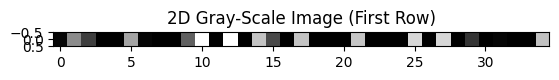

In [ ]:
plt.imshow(image, cmap='gray', interpolation='nearest')
plt.title('2D Gray-Scale Image (First Row)')

plt.show()

## Per tutte le righe

In [ ]:

# Assuming your data is stored in a Pandas DataFrame
# Adjust 'column_names' to the actual names of your 35 important features
your_dataframe = dfDDoS

# Initialize a list to store reshaped images
images_list = []

# Iterate through all rows in the DataFrame
for index, row in your_dataframe.iterrows():
    # Extract the row data
    row_data = row[column_names].values

    # Reshape the 1D data into a 2D grid
    image_size = (1, len(column_names))
    grid = np.reshape(row_data, image_size)

    # Create a 2D gray-scale image
    image = np.array(grid * 255, dtype=np.uint8)  # Assuming already in [0, 1] range

    # Append the image to the list
    images_list.append(image)

# Stack the images to create a 3D array
images_array = np.stack(images_list, axis=0)

# Print the shape of the resulting array
print("Shape of the images array:", images_array.shape)


Shape of the images array: (95133, 1, 35)


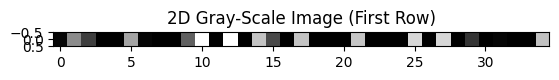

In [ ]:
# Display the first image from the array
plt.imshow(images_array[0], cmap='gray', interpolation='nearest')
plt.title('2D Gray-Scale Image (First Row)')
plt.show()

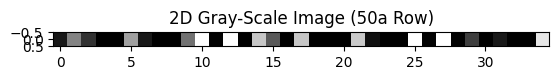

In [ ]:
plt.imshow(images_array[50], cmap='gray', interpolation='nearest')
plt.title('2D Gray-Scale Image (50a Row)')
plt.show()

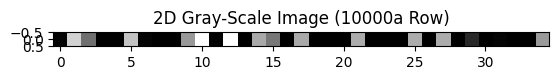

In [ ]:
plt.imshow(images_array[10000], cmap='gray', interpolation='nearest')
plt.title('2D Gray-Scale Image (10000a Row)')
plt.show()

In [ ]:
print(images_array.shape)
print(dfDDoS.shape)

(95133, 1, 35)
(95133, 35)
